In [1]:
# Every year many students give the GRE exam to get admission in foreign Universities. The data
# set contains GRE Scores (out of 340), TOEFL Scores (out of 120), University Rating (out of 5),
# Statement of Purpose strength (out of 5), Letter of Recommendation strength (out of 5),
# Undergraduate GPA (out of 10), Research Experience (0=no, 1=yes), Admitted (0=no, 1=yes).
# Admitted is the target variable.
# Data Set Available on kaggle (The last column of the dataset needs to be changed to 0 or 1)Data
# Set : https://www.kaggle.com/mohansacharya/graduate-admissions
# The counselor of the firm is supposed check whether the student will get an admission or not
# based on his/her GRE score and Academic Score. So to help the counselor to take appropriate
# decisions build a machine learning model classifier using Decision tree to predict whether a
# student will get admission or not.
# Apply Data pre-processing (Label Encoding, Data Transformation….) techniques if
# necessary.
#  Perform data-preparation (Train-Test Split)
# C. Apply Machine Learning Algorithm
# D. Evaluate Model.

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("Admission_Predict.csv")

In [4]:
from sklearn.preprocessing import Binarizer

In [5]:
bi=Binarizer(threshold=0.75)

In [6]:
df['Chance of Admit ']=bi.fit_transform(df[['Chance of Admit ']])
x=df.drop('Chance of Admit ',axis=1)
y=df['Chance of Admit ']

In [7]:
x

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1
396,397,325,107,3,3.0,3.5,9.11,1
397,398,330,116,4,5.0,4.5,9.45,1
398,399,312,103,3,3.5,4.0,8.78,0


In [8]:
y

0      1.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
395    1.0
396    1.0
397    1.0
398    0.0
399    1.0
Name: Chance of Admit , Length: 400, dtype: float64

In [9]:
y=y.astype(int)

In [10]:
y

0      1
1      1
2      0
3      1
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Chance of Admit , Length: 400, dtype: int32

<AxesSubplot:xlabel='Chance of Admit ', ylabel='count'>

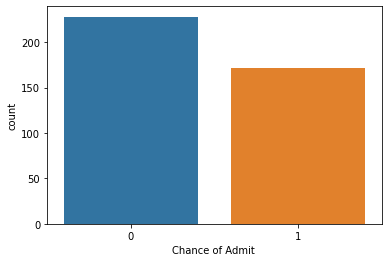

In [11]:
import seaborn as sns
sns.countplot(x=y)

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=True)

In [13]:
x_train

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
82,83,320,110,5,5.0,4.5,9.22,1
367,368,311,98,1,1.0,2.5,7.46,0
179,180,307,102,3,3.0,3.0,8.27,0
27,28,298,98,2,1.5,2.5,7.50,1
89,90,316,109,4,4.5,3.5,8.76,1
...,...,...,...,...,...,...,...,...
255,256,307,110,4,4.0,4.5,8.37,0
72,73,321,111,5,5.0,5.0,9.45,1
396,397,325,107,3,3.0,3.5,9.11,1
235,236,326,111,5,4.5,4.0,9.23,1


In [14]:
y_train

82     1
367    0
179    0
27     0
89     0
      ..
255    1
72     1
396    1
235    1
37     0
Name: Chance of Admit , Length: 300, dtype: int32

In [15]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(random_state=0)
classifier.fit(x_train,y_train)


DecisionTreeClassifier(random_state=0)

In [16]:
y_pred=classifier.predict(x_test)

In [17]:
result=pd.DataFrame({
    "actual":y_test,
    "predicted":y_pred
})

In [18]:
result

,actual,predicted
398,0,1
125,0,0
328,1,1
339,1,0
172,1,1
...,...,...
300,0,0
277,0,0
289,1,1
260,1,1


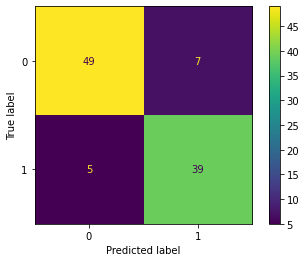

In [19]:
from sklearn.metrics import classification_report , accuracy_score,ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [20]:
accuracy_score(y_test,y_pred)

0.88

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89        56
           1       0.85      0.89      0.87        44

    accuracy                           0.88       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.88      0.88      0.88       100



In [22]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
print("MAR=",mean_squared_error(y_test,y_pred))
print("MAE=",mean_absolute_error(y_test,y_pred))
print("RMSE=",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 Score=",r2_score(y_test,y_pred))

MAR= 0.12
MAE= 0.12
RMSE= 0.34641016151377546
R2 Score= 0.5129870129870131
